429    St Dunstans House EC4A;514 Sq Ft;One Bedroom;I...
430    St Dunstans House EC4A;514 Sq Ft;One Bedroom;I...
431    St Dunstans House EC4A;514 Sq Ft;One Bedroom;I...
432    A collection of 9 three-bedroom contemporary r...
433    Studio Suite;20th Floor;24 Hour Concierge;On-S...
Name: content, dtype: object
(double, glazed)        23911
(double, bedroom)       20238
(glazed, window)        16946
(first, floor)          15168
(ground, floor)         12492
(reception, room)       12116
(rear, garden)          11092
(two, bedroom)          10284
(two, double)           10180
(open, plan)             9692
(transport, link)        9425
(fitted, kitchen)        8442
(one, bedroom)           8319
(family, bathroom)       8075
(service, charge)        7751
(ground, rent)           7350
(walking, distance)      7143
(three, bedroom)         6939
(brochure, brochure)     6934
(communal, garden)       6874
dtype: int64
(double, glazed)        23911
(double, bedroom)       20238
(glazed, wind

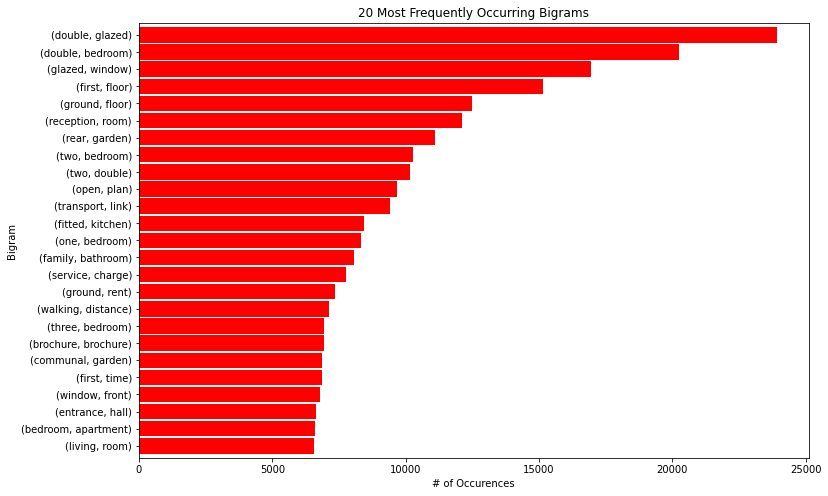

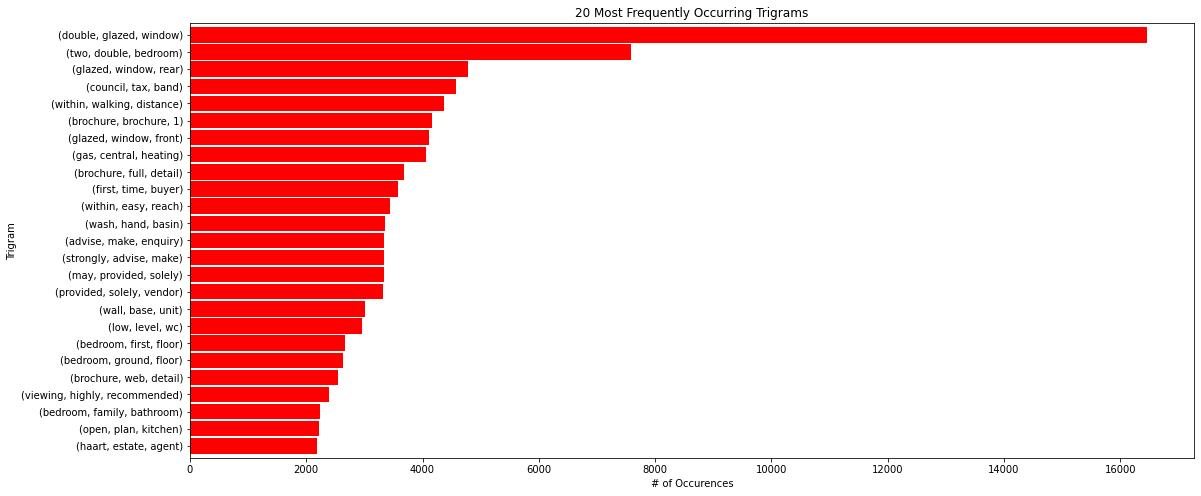

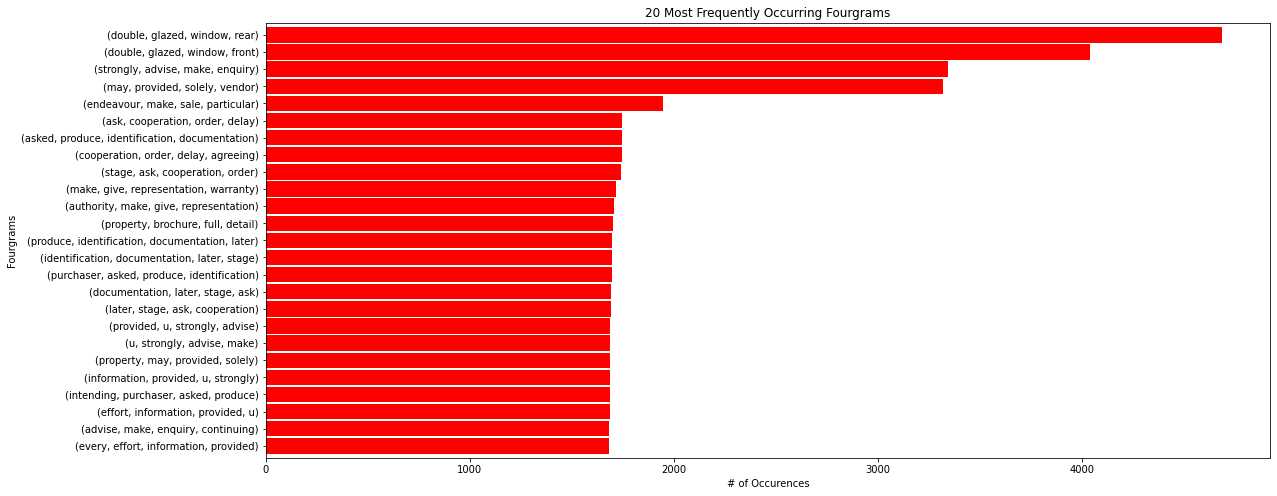

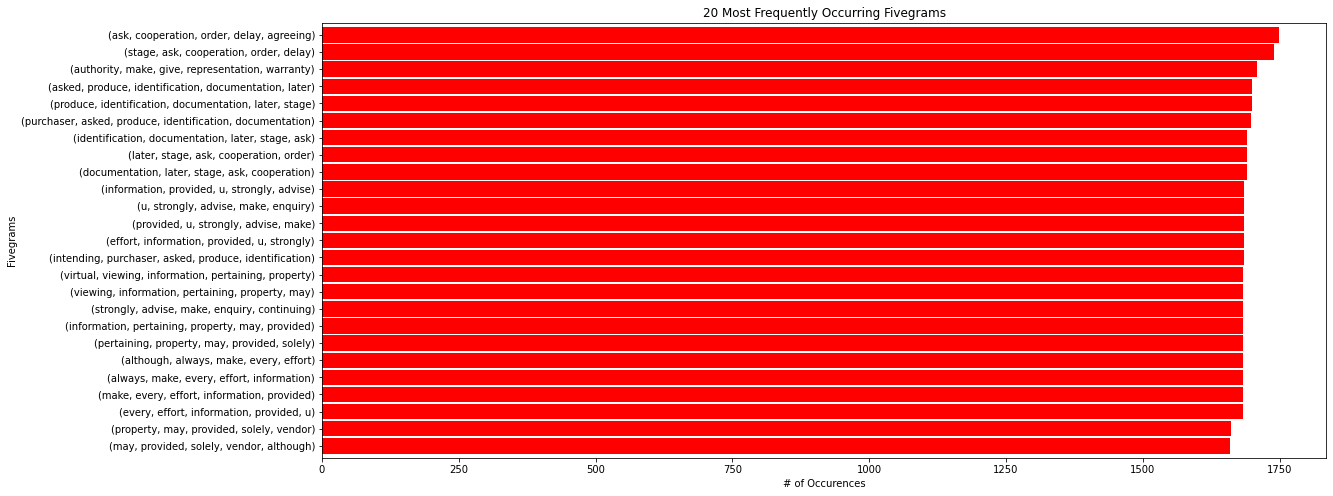

In [1]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords  # add appropriate words that will be ignored in the analysis
import pandas as pd
import wordcloud
from globalfunction import vv


df = pd.read_csv(vv.LISTING_ENRICHED_FILE)
df = df[['bullet_points', 'long_description']]
#df = df[:1000]
df.dropna(inplace=True)
df['content'] = df['bullet_points'] + df['long_description'] + ' sppp'
print(df['content'].head())

########

ADDITIONAL_STOPWORDS = ['covfefe','sppp','offer','contract','verify']
ADDITIONAL_STOPWORDS.extend(wordcloud.STOPWORDS)
import matplotlib.pyplot as plt

def basic_clean(text):
    """
    A simple function to clean up the data. All the words that
    are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

words = basic_clean(''.join(str(df['content'].tolist())))
bigram_frequencies = pd.Series(nltk.ngrams(words, 2)).value_counts()
trigram_frequencies = pd.Series(nltk.ngrams(words, 3)).value_counts()
fourgram_frequencies = pd.Series(nltk.ngrams(words, 4)).value_counts()
fivegram_frequencies = pd.Series(nltk.ngrams(words, 5)).value_counts()

print((bigram_frequencies)[:20])
print((bigram_frequencies)[:20])
print(len(trigram_frequencies))
print(len(trigram_frequencies))


bigrams_series = (bigram_frequencies)[:25]
trigrams_series = (trigram_frequencies)[:25]

bigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occurring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurences')
plt.show()

trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(18, 8))
plt.title('20 Most Frequently Occurring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurences')
plt.show()

fourgram_frequencies[:25].sort_values().plot.barh(color='red', width=.9, figsize=(18, 8))
plt.title('20 Most Frequently Occurring Fourgrams')
plt.ylabel('Fourgrams')
plt.xlabel('# of Occurences')
plt.show()

fivegram_frequencies[:25].sort_values().plot.barh(color='red', width=.9, figsize=(18, 8))
plt.title('20 Most Frequently Occurring Fivegrams')
plt.ylabel('Fivegrams')
plt.xlabel('# of Occurences')
plt.show()
